In [1]:
!pip install unrar
!unrar x "/content/recordings.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/recordings.rar

Creating    recordings_filtered                                       OK
Creating    recordings_filtered/1                                     OK
Extracting  recordings_filtered/1/column1.txt                              0%  OK 
Extracting  recordings_filtered/1/column3.txt                              1%  OK 
Extracting  recordings_filtered/1/metadata.txt                             1%  OK 
Creating    recordings_filtered/10                                    OK
Extracting  recordings_filtered/10/column1.txt                             2%  OK 
Extracting  recordings_filtered/10/column3.txt                             3%  OK 
Extracting  recordings_filtered/10/metadata.txt                            3%  OK 
Creating    recordings_filtered/11                                    OK
Extracting  recordings_filtered/11/colu

In [24]:
import os
from datetime import datetime
import numpy as np
import numpy as np
import pandas as pd
from scipy import stats
from scipy.fft import fft
from scipy.signal import find_peaks
from itertools import groupby
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
class Patient:
    def __init__(self, id, name, surname, test_date, breath_sensor, audio_sensor, is_sick):
        self.id = id  # Hasta numarası
        self.name = name  # Hastanın adı
        self.surname = surname  # Hastanın soyadı
        self.test_date = test_date  # Test tarihi (datetime objesi)
        self.breath_sensor = breath_sensor  # column1.txt verisi: integer listesi
        self.audio_sensor = audio_sensor  # column3.txt verisi: double dizisi (list of floats)
        self.is_sick = is_sick

   # def __repr__(self):
       # return (f"Id={self.id},Name={self.name}, Surname={self.surname}, Test_Date={self.test_date}, "
        #        f"breath_sensor={self.breath_sensor}, audio_sensor={self.audio_sensor}, is_patient={self.is_sick}")

    def __repr__(self):
       return (f"Id={self.id} "
                f"breath_sensor={self.breath_sensor}, is_patient={self.is_sick}")

In [43]:
# 'recordings_filtered' klasörünün yolu
base_dir = '/content/recordings_filtered'

# Hasta nesnelerini saklamak için bir liste
patient_list = []

# 1'den 50'ye kadar olan klasörlerde döngü
for i in range(1, 51):
    folder_path = os.path.join(base_dir, str(i))  # Her bir klasörün yolu

    # column1.txt, column3.txt ve hasta bilgilerini içeren dosya yolları
    column1_path = os.path.join(folder_path, 'column1.txt')
    column3_path = os.path.join(folder_path, 'column3.txt')

    # Hasta bilgilerini içeren metadata.txt dosyasının yolu
    metadata_path = os.path.join(folder_path, 'metadata.txt')

    try:
        with open(column1_path, 'r') as file1, open(column3_path, 'r') as file3, open(metadata_path, 'r') as meta_file:

            id = i

            if(i<=35):
              is_sick = False
            else:
              is_sick = True

            # column1.txt içeriğini integer listesine çevir
            breath_sensor = list(map(int, file1.read().strip()[1:-1].split('\n')))  # [2,3,5,9,0,7] formatında

            # column3.txt içeriğini bir double dizisine çevir
            audio_sensor = list(map(float, file3.read().strip().split()))

            # metadata.txt dosyasından hasta bilgilerini al (ad, soyad, test tarihi)
            metadata_lines = meta_file.read().strip().split('\n')

            # Patient Name: John Doe satırından adı al
            name_surname = metadata_lines[0].replace("Patient Name: ", "")
            name, surname = name_surname.split(" ", 1)  # Ad ve soyadı ayır

            # Date: 2025-03-22_16-43-37 satırından test tarihini al
            test_date_str = metadata_lines[1].replace("Date: ", "")
            # Test tarihini datetime objesine dönüştür (Date: 2025-03-22_16-43-37 formatı)
            test_date = datetime.strptime(test_date_str, '%Y-%m-%d_%H-%M-%S')

            # Yeni Hasta nesnesini oluştur
            patient = Patient(id, name, surname, test_date, breath_sensor, audio_sensor, is_sick)

            # Hasta nesnesini listeye ekle
            patient_list.append(patient)
    except FileNotFoundError:
        print(f"Dosya bulunamadı: {folder_path}")
        continue

# Listeyi görüntüle (isteğe bağlı)
for patient in patient_list:
    print(patient)

Id=1 breath_sensor=[95, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4027, 3864, 3393, 3237, 2919, 2910, 2769, 2749, 2509, 2352, 2051, 1681, 2098, 2495, 2969, 3347, 4022, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 3939, 3550, 2742, 1935, 1538, 987, 900, 1244, 1433, 1352, 1823, 1903, 1727, 1799, 1802, 1635, 2032, 2671, 3217, 3693, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 3455, 2644, 1829, 1011, 193, 134, 721, 971, 1314, 1522, 1608, 1189, 1599, 2074, 2683, 3296, 3939, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 3788, 3070, 2282, 1473, 654, 142, 55, 31, 25, 43, 62, 75, 487, 1301, 2102, 2903, 3693, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 409], is_patient=False
Id=2 breath_sensor=[95, 4095, 40

In [44]:
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import skew, kurtosis
from itertools import groupby
from scipy.fft import fft

def extract_all_features(sensor_data, timestamps=None, max_val=4095):
    """KOAH hastalığı tespiti için nefes verisinden özellikler çıkarır"""

    # Sensör verisini NumPy array'e çevir
    sensor_data = np.array(sensor_data)

    # Eğer zaman verisi sağlanmadıysa, indeks numarasını zaman olarak kabul et
    if timestamps is None:
        timestamps = np.arange(len(sensor_data))
    else:
        timestamps = np.array(timestamps)

    # Zirve (peak) ve çukur (trough) noktalarını bul
    peaks, _ = find_peaks(sensor_data, height=max_val * 0.8, distance=10)
    troughs, _ = find_peaks(max_val - sensor_data, height=max_val * 0.8, distance=10)

    peak_values = sensor_data[peaks] if len(peaks) > 0 else [0]
    trough_values = sensor_data[troughs] if len(troughs) > 0 else [0]

    # FEV1/FVC oranı (KOAH teşhisinde kullanılan en önemli metriklerden biri)
    fev1 = np.percentile(sensor_data, 75)  # Yaklaşık ilk %75'lik değer
    fvc = np.sum(sensor_data)  # Toplam nefes kapasitesi (yaklaşık hesaplama)
    fev1_fvc_ratio = fev1 / fvc if fvc != 0 else 0

    # PEF (Peak Expiratory Flow) - Zirve nefes verme hızı
    pef = np.max(sensor_data)

    # Solunum süresi
    breath_duration = timestamps[-1] - timestamps[0] if len(timestamps) > 1 else 0

    # Eğilim (Trend) hesaplama
    slope = np.polyfit(timestamps, sensor_data, 1)[0] if len(sensor_data) > 1 else 0

    # Frekans alanı analizi (Fourier Transform)
    fft_coeffs = np.abs(fft(sensor_data))[:10]  # İlk 10 bileşeni al

    # Özellikleri hesapla
    features = {
        # Temel istatistiksel özellikler
        'mean_force': np.mean(sensor_data),
        'std_force': np.std(sensor_data),
        'min_force': np.min(sensor_data),
        'max_force': np.max(sensor_data),
        'skewness': skew(sensor_data),
        'kurtosis': kurtosis(sensor_data),

        # Nefes dalgası özellikleri
        'num_peaks': len(peaks),
        'num_troughs': len(troughs),
        'avg_peak_height': np.mean(peak_values),
        'avg_trough_depth': np.mean(trough_values),
        'breath_amplitude': np.mean(peak_values) - np.mean(trough_values) if len(peaks) > 0 and len(troughs) > 0 else 0,
        'peak_variability': np.std(peak_values) if len(peaks) > 1 else 0,
        'trough_variability': np.std(trough_values) if len(troughs) > 1 else 0,
        'max_cluster': max(len(list(g)) for k, g in groupby(sensor_data == max_val)) if max_val in sensor_data else 0,

        # KOAH için kritik özellikler
        'fev1_fvc_ratio': fev1_fvc_ratio,  # KOAH teşhisi için kritik oran
        'pef': pef,  # Zirve nefes verme hızı
        'breath_duration': breath_duration,  # Nefes süresi
        'slope': slope,  # Nefes gücünün zaman içindeki değişim eğilimi

        # Frekans alanı özellikleri
        'fft_coeff_1': fft_coeffs[0] if len(fft_coeffs) > 0 else 0,
        'fft_coeff_2': fft_coeffs[1] if len(fft_coeffs) > 1 else 0,
        'fft_coeff_3': fft_coeffs[2] if len(fft_coeffs) > 2 else 0,
        'fft_coeff_4': fft_coeffs[3] if len(fft_coeffs) > 3 else 0,
        'fft_coeff_5': fft_coeffs[4] if len(fft_coeffs) > 4 else 0,
    }

    return features


In [11]:
pd.set_option("display.max_columns", None)

In [47]:
df

,mean,std_dev,min,range,median,skewness,kurtosis,q1,q3,iqr,mean_force,std_force,min_force,max_force,num_peaks,num_troughs,avg_peak_height,avg_trough_depth,breath_amplitude,peak_variability,trough_variability,max_cluster,fev1_fvc_ratio,pef,breath_duration,slope,fft_coeff_1,fft_coeff_2,fft_coeff_3,fft_coeff_4,fft_coeff_5,entropy,zero_crossings,autocorr_lag1,dominant_freq,spectral_energy,max_val_percentage,zero_diff_percentage,plateau_count,abrupt_changes,is_sick
0,3121.735849,1328.131522,25,4070,4095.0,-1.044728,-0.324315,2062.50,4095.0,2032.50,3121.735849,1328.131522,25,4095,5,2,4095.000000,79.500000,4015.500000,0.000000,54.500000,21,0.008250,4095,158,-1.659338,496356.0,19776.994160,23767.117189,19814.004008,103281.341277,1.889867,10,0.915055,0,2.686663e+11,0.540881,0.512658,0.490566,0.012658,False
1,3025.272727,1615.783708,5,4090,4095.0,-1.045474,-0.708875,1827.50,4095.0,2267.50,3025.272727,1615.783708,5,4095,4,3,4095.000000,24.666667,4070.333333,0.000000,15.542058,32,0.008790,4095,153,1.520885,465892.0,41553.660366,45195.836092,41476.524700,131488.227301,1.471935,8,0.940759,0,2.480137e+11,0.629870,0.620915,0.383117,0.013072,False
2,2747.643312,1706.886557,0,4095,4095.0,-0.698186,-1.307849,895.00,4095.0,3200.00,2747.643312,1706.886557,0,4095,5,4,4095.000000,6.000000,4089.000000,0.000000,4.636809,23,0.009493,4095,156,6.490790,431380.0,14279.522583,8092.670190,22127.029614,155899.432097,1.628708,10,0.941718,0,2.219956e+11,0.528662,0.500000,0.503185,0.012821,False
3,2799.780000,1685.624287,2,4093,4095.0,-0.758843,-1.204531,1001.75,4095.0,3093.25,2799.780000,1685.624287,2,4095,5,4,4095.000000,12.750000,4082.250000,0.000000,10.425330,21,0.009751,4095,149,-1.114885,419967.0,3651.009432,8695.029556,19411.626992,145953.829770,1.597120,10,0.935653,0,2.083370e+11,0.540000,0.536913,0.466667,0.013423,False
4,3004.493506,1633.066998,3,4092,4095.0,-1.014784,-0.781829,1689.50,4095.0,2405.50,3004.493506,1633.066998,3,4095,4,3,4095.000000,31.333333,4063.666667,0.000000,31.329787,28,0.008850,4095,153,-0.380512,462692.0,42374.924803,48669.088054,37074.767660,134132.267579,1.454193,8,0.940787,0,2.457080e+11,0.623377,0.607843,0.396104,0.013072,False
5,2746.155556,1684.371188,8,4087,4095.0,-0.676000,-1.323898,835.50,4095.0,3259.50,2746.155556,1684.371188,8,4095,6,5,4095.000000,37.000000,4058.000000,0.000000,28.802778,23,0.008284,4095,179,-0.514975,494308.0,10831.653593,20860.694738,41300.555652,90041.657049,1.789162,12,0.941229,0,2.903007e+11,0.516667,0.497207,0.505556,0.011173,False
6,2993.880240,1497.801302,26,4069,4095.0,-0.881822,-0.918537,1389.50,4095.0,2705.50,2993.880240,1497.801302,26,4095,5,4,4095.000000,269.000000,3826.000000,0.000000,219.510820,25,0.008190,4095,166,-1.718375,499978.0,29386.628929,17855.507027,24582.003152,99970.375511,1.772434,10,0.932054,0,2.812601e+11,0.562874,0.542169,0.461078,0.012048,False
7,3217.970414,1415.645977,95,4000,4095.0,-1.221619,-0.243617,2477.00,4095.0,1618.00,3217.970414,1415.645977,95,4095,4,3,4095.000000,214.000000,3881.000000,0.000000,82.957821,34,0.007530,4095,168,-2.113067,543837.0,17253.111743,39054.927509,100405.282937,64589.075286,1.467119,8,0.933727,0,3.243774e+11,0.650888,0.630952,0.372781,0.011905,False
8,3353.085227,1237.346643,63,4032,4095.0,-1.449967,0.653640,2784.75,4095.0,1310.25,3353.085227,1237.346643,63,4095,5,3,4095.000000,340.333333,3754.666667,0.000000,213.699685,28,0.006939,4095,175,4.150369,590143.0,20755.353291,8822.391166,22945.968172,109710.391472,1.550071,10,0.909233,0,3.719808e+11,0.647727,0.622857,0.380682,0.011429,False
9,3135.217143,1444.307351,36,4059,4095.0,-1.145208,-0.355286,2140.50,4095.0,1954.50,3135.217143,1444.307351,36,4095,5,3,4095.000000,76.333333,4018.666667,0.000000,54.236109,26,0.007464,4095,174,6.623838,548663.0,30522.408278,5224.137077,24105.301234,135620.245983,1.642338,10,0.930827,0,3.329726e+11,0.577143,0.563218,0.440000,0.011494,False


In [51]:
labels = []

for patient in patient_list:
    labels.append(patient.is_sick)

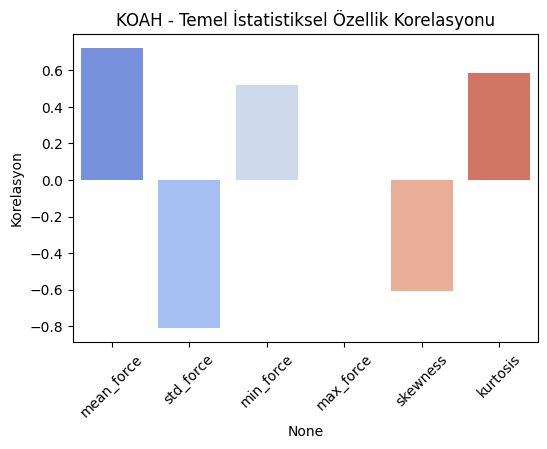

In [52]:
# Temel istatistiksel özellikler
basic_stats = df[['mean_force', 'std_force', 'min_force', 'max_force', 'skewness', 'kurtosis']].copy()
basic_stats['is_sick'] = labels  # .loc ile veri ekleme

# Korelasyon hesapla
corr_basic = basic_stats.corr()['is_sick'].drop('is_sick')

# Korelasyonu görselleştir;
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_basic.index, y=corr_basic.values, palette='coolwarm', hue=corr_basic.index)
plt.xticks(rotation=45)
plt.title("KOAH - Temel İstatistiksel Özellik Korelasyonu")
plt.ylabel("Korelasyon")
plt.show()

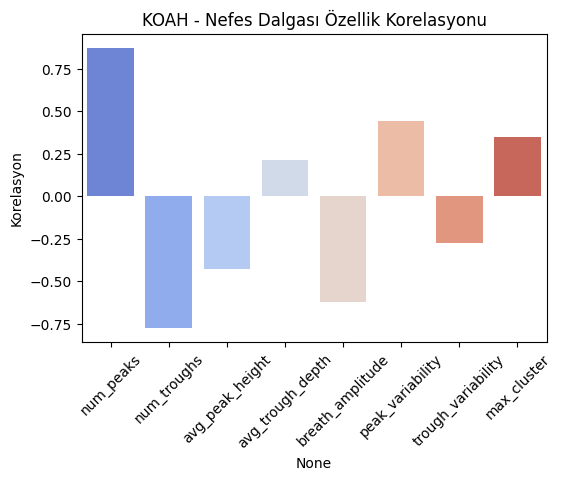

In [53]:
# Nefes dalgasına özel özellikler
breath_features = df[['num_peaks', 'num_troughs', 'avg_peak_height','avg_trough_depth','breath_amplitude','peak_variability','trough_variability','max_cluster']].copy()
breath_features['is_sick'] = labels  # .loc ile veri ekleme

# Korelasyon hesapla
corr_breath = breath_features.corr()['is_sick'].drop('is_sick')

# Korelasyonu görselleştir
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_breath.index, y=corr_breath.values, palette='coolwarm', hue=corr_breath.index)
plt.xticks(rotation=45)
plt.title("KOAH - Nefes Dalgası Özellik Korelasyonu")
plt.ylabel("Korelasyon")
plt.show()

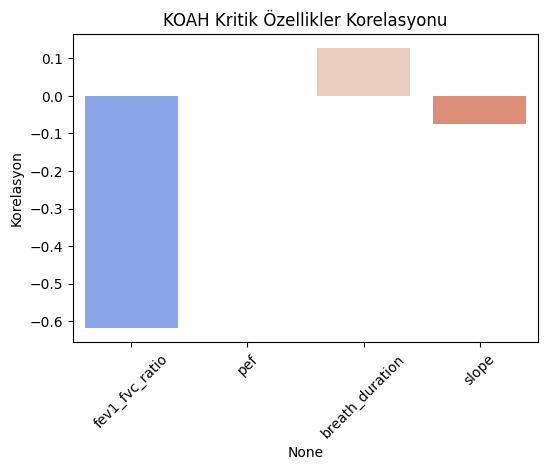

In [54]:
# KOAH için kritik özellikler
freq_features = df[['fev1_fvc_ratio', 'pef', 'breath_duration', 'slope']].copy()
freq_features['is_sick'] = labels  # .loc ile veri ekleme

# Korelasyon hesapla
corr_freq = freq_features.corr()['is_sick'].drop('is_sick')

# Korelasyonu görselleştir
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_freq.index, y=corr_freq.values, palette='coolwarm', hue=corr_freq.index)
plt.xticks(rotation=45)
plt.title("KOAH Kritik Özellikler Korelasyonu")
plt.ylabel("Korelasyon")
plt.show()

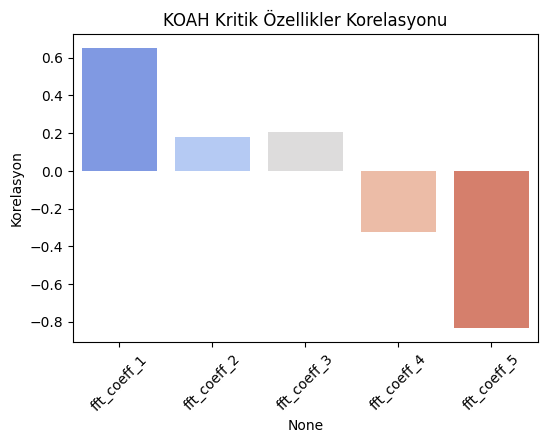

In [55]:
# KOAH için frekans alanı özellikler
freq_features = df[['fft_coeff_1', 'fft_coeff_2', 'fft_coeff_3', 'fft_coeff_4', 'fft_coeff_5']].copy()
freq_features['is_sick'] = labels  # .loc ile veri ekleme

# Korelasyon hesapla
corr_freq = freq_features.corr()['is_sick'].drop('is_sick')

# Korelasyonu görselleştir
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_freq.index, y=corr_freq.values, palette='coolwarm', hue=corr_freq.index)
plt.xticks(rotation=45)
plt.title("KOAH Kritik Özellikler Korelasyonu")
plt.ylabel("Korelasyon")
plt.show()

In [ ]:
!cp -r "/content/recordings_filtered" "/content/drive/MyDrive/bitirmeProjesi/"